# Data Cleaning

### Import

In [1]:

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data.csv")
df.head()

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
2,Banana,California,3.80,2.3,970.0,98,0.0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3


### Check for NaN Values

In [3]:
df[df.isna().any(axis=1)]

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
5,NaN,California,3.80,1.2,NaN,95,0.0,4
10,Admit,Florida,3.80,1.7,968.0,91,NaN,3
23,Admit,California,NaN,2.8,967.0,95,1.0,3
70,Waitlist,California,3.42,0.7,869.0,84,NaN,3


In [4]:
df.dropna(inplace = True)

### Check categorical columns

In [5]:
cat_cols = ["Decision","State"]
df[cat_cols].value_counts()

Decision  State      
Decline   Florida        13
Waitlist  Florida        11
Admit     Florida        11
          Colorado       10
          California      9
Decline   Colorado        6
Waitlist  Colorado        4
          Utah            3
Decline   virginia        2
Waitlist  California      2
Decline   Utah            2
          Virginia        2
Admit     Utah            1
Banana    California      1
Decline   mississippi     1
          California      1
          Oregon          1
Waitlist  Alabama         1
          Georgia         1
          New York        1
          Vermont         1
Name: count, dtype: int64

In [6]:
df = df[df["Decision"] != "Banana"]
df["State"] = df["State"].str.lower()

### Check level columns

In [7]:
level_cols = ["Gender","VolunteerLevel"]
df[level_cols].value_counts()

Gender  VolunteerLevel
 0.0    2                 10
 1.0    5                 10
        1                 10
 0.0    4                  9
        1                  8
 1.0    0                  8
        4                  7
        3                  6
        2                  5
 0.0    0                  4
        3                  3
        5                  2
-1.0    3                  1
Name: count, dtype: int64

In [8]:
df = df[df["Gender"] >= 0]

### Check numeric columns

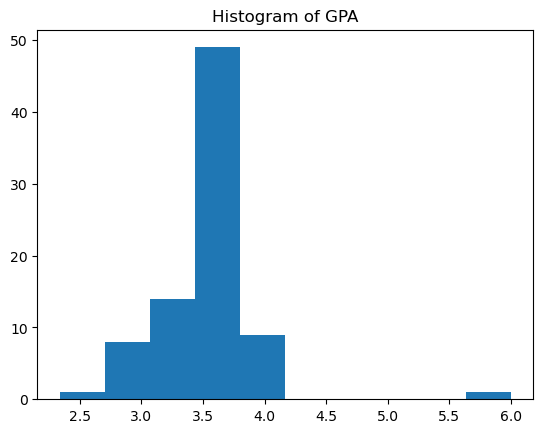

In [9]:
plt.hist(df["GPA"])

plt.title("Histogram of GPA")

plt.show()

In [10]:
df = df[df["GPA"] <= 4]

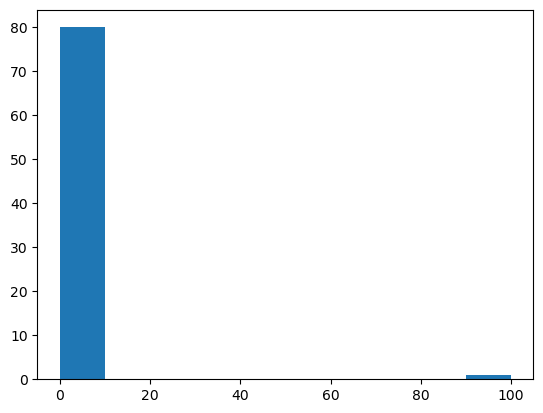

In [11]:
plt.hist(df["WorkExp"])
plt.show()

In [12]:
df = df[df["WorkExp"] < 20]

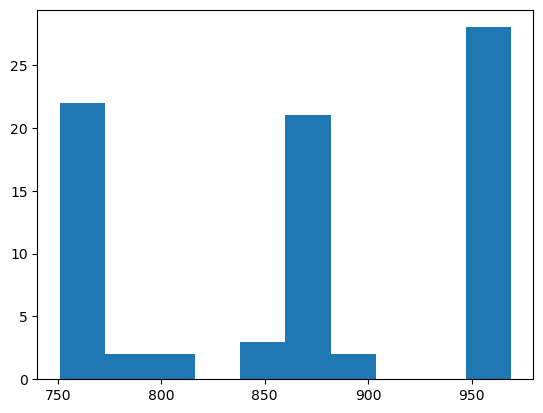

In [13]:
plt.hist(df["TestScore"])
plt.show()

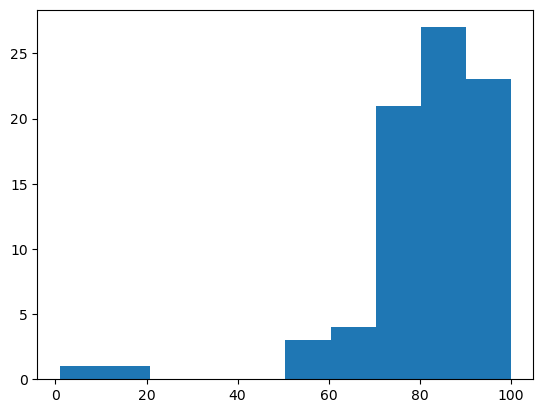

In [14]:
plt.hist(df["WritingScore"])
plt.show()

In [15]:
df["WritingScore"].describe()

count     80.000000
mean      81.612500
std       15.912334
min        1.000000
25%       76.750000
50%       83.500000
75%       91.500000
max      100.000000
Name: WritingScore, dtype: float64

In [16]:
df.to_csv("clean_data.csv", index = False)